In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

# Variable aleatoria discreta

## Suma de dos dados

In [2]:
vals  = np.arange(2, 13)
probs = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36
print(vals)
print(probs)

[ 2  3  4  5  6  7  8  9 10 11 12]
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


In [3]:
probs.sum()

1.0

In [4]:
npr.seed(0)

In [5]:
ns = 1000
samples = npr.choice(vals, p=probs, size=ns)
print(samples[:10])

[ 7  8  8  7  7  8  7 10 11  6]


Un histograma consiste en _intervalos_ de la variable aleatoria, y _cuentas_ del número de muestras en el intervalo

In [6]:
bc = np.arange(2, 14) - 0.5
print(bc)

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


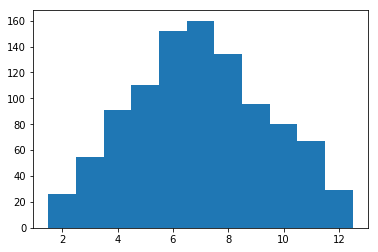

In [7]:
counts, bins, _ = plt.hist(samples, bins=bc)

In [8]:
print('Cuentas:\n', counts, '\n')
print('Intervalos:\n', bins)

Cuentas:
 [ 26.  55.  91. 110. 152. 160. 134.  96.  80.  67.  29.] 

Intervalos:
 [ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


## Función de masa de probabilidad (pmf)

Las cuentas en el histograma no corresponden a la pmf, pero la pmf se puede approximar usando las cuentas:  Para un valor $a$ en el intervalo $b$,

\begin{equation*}
p(a) \approx \frac{\text{cuenta}(b)}{n_\mathrm{s}}
\end{equation*}

<StemContainer object of 3 artists>

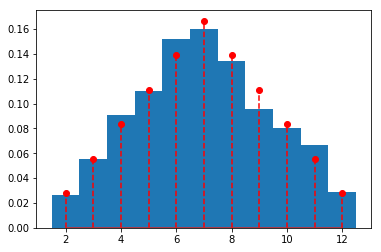

In [9]:
weights = np.ones_like(samples) / ns
plt.hist(samples, bins=bc, weights=weights)
plt.stem(vals, probs, markerfmt='ro', linefmt='r--')

# Variable aleatoria contínua

## Variable normal estándar

\begin{equation*}
X \sim \mathcal{N}(0, 1)
\end{equation*}

In [10]:
samples = npr.standard_normal(1000)
print(samples[:10])

[-0.10169727  0.01927938  1.84959125 -0.21416666 -0.49901664  0.02135122
 -0.91911344  0.19275385 -0.36505522 -1.79132755]


Podemos calcular un histograma cumulativo, en el que el valor cumulativo para cada intervalo corresponde a la suma de la cuenta del intervalo y de todos los intervalos menores al intervalo en cuestión

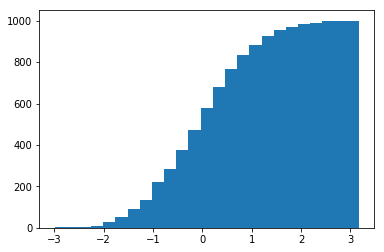

In [11]:
counts, bins, _ = plt.hist(samples, cumulative=True, bins='auto')

## Función de densidad cumulativa (cdf)

Dividiendo las cuentas por el número de muestras, obtenemos una aproximación de la cdf

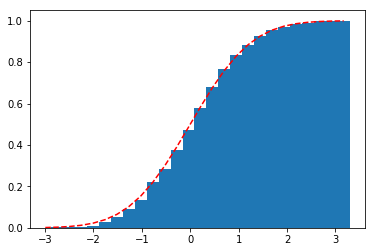

In [12]:
counts, bins, _ = plt.hist(samples, cumulative=True, bins='auto', density=True, align='right')
plt.plot(bins, sps.norm.cdf(bins), 'r--')

## Función de densidad de probabilidad (pdf)

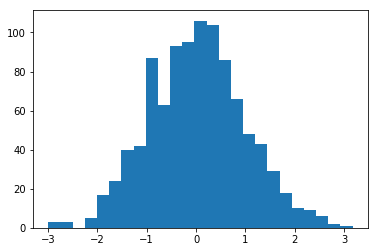

In [13]:
counts, bins, _ = plt.hist(samples, bins='auto')

In [14]:
print(counts)
print(bins)

[  3.   3.   0.   5.  17.  24.  40.  42.  87.  63.  93.  95. 106. 104.
  86.  66.  48.  43.  29.  18.  10.   9.   6.   2.   1.]
[-2.99461286 -2.74798935 -2.50136585 -2.25474234 -2.00811884 -1.76149533
 -1.51487183 -1.26824832 -1.02162482 -0.77500131 -0.52837781 -0.2817543
 -0.0351308   0.21149271  0.45811621  0.70473972  0.95136323  1.19798673
  1.44461024  1.69123374  1.93785725  2.18448075  2.43110426  2.67772776
  2.92435127  3.17097477]


Podemos introducir el concepto de "densidad" $p(a)$ en términos de las cuentas de los intervalos y la longitud de cada intervalo, $\Delta(\cdot)$.  Para el valor $a$ en el intervalo $b$,

\begin{equation*}
p(a) \approx \frac{\text{cuenta}(b)}{n_\mathrm{s} \Delta(b)}
\end{equation*}

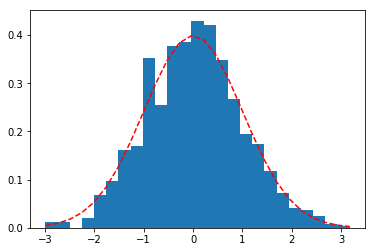

In [15]:
_, _, _ = plt.hist(samples, bins='auto', density=True)
plt.plot(bins, sps.norm.pdf(bins), 'r--')